In [1]:
# Play with OpenWeatherMap API

In [2]:
import requests
import pandas as pd

In [ ]:
API_KEY="021020"
BASE_URL="http://api.openweathermap.org/data/2.5/weather"

In [10]:
params = {
    'q':'London',
    'appid':API_KEY,
    'units':'imperial'
}
response = requests.get(BASE_URL, params=params)
response.status_code

200

In [11]:
response.json()

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 55.58,
  'feels_like': 54.64,
  'temp_min': 53.71,
  'temp_max': 58.01,
  'pressure': 1026,
  'humidity': 81,
  'sea_level': 1026,
  'grnd_level': 1021},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 282, 'gust': 1.01},
 'clouds': {'all': 75},
 'dt': 1730394722,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1730357563,
  'sunset': 1730392521},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [25]:
def get_weather(city):
    params = {
    'q':city,
    'appid':API_KEY,
    'units':'imperial'
    }
    response = requests.get(BASE_URL, params=params)
    assert response.status_code == 200, f"Bad response:{response.status_code}"
    data = response.json()
    result = {
        "temperature":data['main']['temp']
    }
    return result

def test_get_weather():
    result = get_weather("London")
    assert type(result) is dict
    assert "temperature" in result.keys()
    assert type(result["temperature"]) is float
    assert 0.0 <= result["temperature"] <= 150.00
    london_temp = result["temperature"]
    result = get_weather("Tokyo")
    assert result["temperature"] != london_temp


test_get_weather()

In [27]:
for city in ["London","Tokyo","Paris","New York", "Chicago","Seattle","Los Angeles"]:
    print(city, get_weather(city))

London {'temperature': 55.15}
Tokyo {'temperature': 61.95}
Paris {'temperature': 52}
New York {'temperature': 78.19}
Chicago {'temperature': 64.81}
Seattle {'temperature': 47.17}
Los Angeles {'temperature': 65.26}


In [28]:
cities = ["London","Tokyo","Paris","New York", "Chicago","Seattle","Los Angeles"]
results = [{"city":city,"temperature":get_weather(city)['temperature']} for city in cities]
results

[{'city': 'London', 'temperature': 55.15},
 {'city': 'Tokyo', 'temperature': 61.95},
 {'city': 'Paris', 'temperature': 52},
 {'city': 'New York', 'temperature': 78.19},
 {'city': 'Chicago', 'temperature': 64.8},
 {'city': 'Seattle', 'temperature': 47.17},
 {'city': 'Los Angeles', 'temperature': 65.26}]

In [29]:
df = pd.DataFrame(results)
df

,city,temperature
0,London,55.15
1,Tokyo,61.95
2,Paris,52.00
3,New York,78.19
4,Chicago,64.80
5,Seattle,47.17
6,Los Angeles,65.26


<Axes: xlabel='city'>

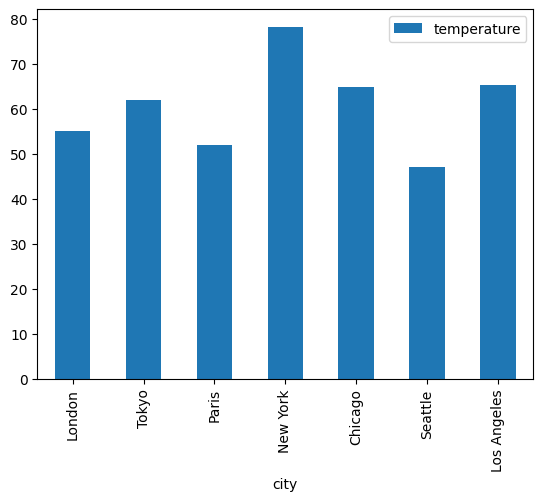

In [32]:
df.plot.bar(x='city')